In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import  classification_report , confusion_matrix

##Load The Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


##**Visaulize the Images**

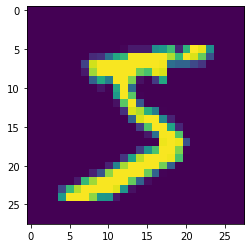

In [3]:
singl_img = x_train[0]

plt.imshow(singl_img)

##**Preprocess the images**

In [4]:
#the labels are  categories of numbers 0 to 9 , need translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem 

y_cat_train = to_categorical(y_train)

y_cat_test = to_categorical(y_test)

y_test[0] , y_cat_test[0]

(7, array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [5]:
x_train.max() , x_train.min() , x_test.max()

(255, 0, 255)

In [6]:
#Normalizing the x data , since 255 is max value & 0 is the min value 

x_train = x_train/255

x_test = x_test/255

x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

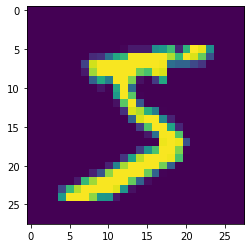

In [7]:
plt.imshow(x_train[0])

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
#Reshaping the Data Right now our data is 60,000 images stored in 28 by 28 pixel array formation.This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel

x_train = x_train.reshape(60000,28,28,1)

x_test = x_test.reshape(10000,28,28,1)

x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

##**Train the Model**

In [10]:
model = Sequential()

#the CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1),activation='relu'))
#pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER 
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10,activation='softmax'))

#Compile the Model 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [12]:
#initiate EarlyStoping 
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [13]:
# Fit the Model

model.fit(x_train,y_cat_train,batch_size=32,epochs=32,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/32
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2378 - accuracy: 0.9295 - val_loss: 0.0671 - val_accuracy: 0.9787
Epoch 2/32
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0967 - accuracy: 0.9712 - val_loss: 0.0455 - val_accuracy: 0.9852
Epoch 3/32
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0729 - accuracy: 0.9769 - val_loss: 0.0378 - val_accuracy: 0.9877
Epoch 4/32
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0596 - accuracy: 0.9816 - val_loss: 0.0325 - val_accuracy: 0.9885
Epoch 5/32
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0324 - val_accuracy: 0.9896
Epoch 6/32
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0430 - accuracy: 0.9865 - val_loss: 0.0334 - val_accuracy: 0.9892
Epoch 7/32
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0325 -

##**Evaluate the Model**

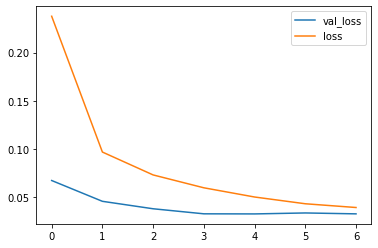

In [14]:
model_loss = pd.DataFrame(model.history.history)
model_loss[['val_loss','loss']].plot()

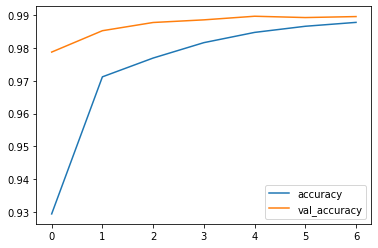

In [15]:
model_loss[['accuracy','val_accuracy']].plot()

In [16]:
model.metrics_names , model.evaluate(x_test,y_cat_test , verbose=0)

(['loss', 'accuracy'], [0.03248744457960129, 0.9894999861717224])

In [17]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred).astype(int)

In [18]:
y_test[5],y_pred[5]

(1, array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]))

In [19]:
class_report = classification_report(y_cat_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
cm = confusion_matrix(y_cat_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[ 976,    0,    1,    0,    0,    1,    0,    1,    1,    0],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   3,    3, 1021,    1,    1,    0,    0,    3,    0,    0],
       [   1,    0,    1, 1001,    0,    3,    0,    3,    1,    0],
       [   2,    0,    0,    0,  974,    0,    0,    0,    0,    6],
       [   4,    0,    0,    5,    0,  879,    2,    1,    1,    0],
       [   4,    3,    0,    0,    2,    2,  946,    0,    1,    0],
       [   2,    2,    4,    1,    1,    0,    0, 1013,    2,    3],
       [   6,    1,    0,    1,    1,    0,    0,    1,  960,    4],
       [   5,    1,    0,    2,    8,    3,    0,    3,    3,  984]])

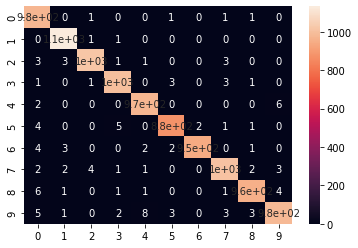

In [21]:

sns.heatmap(cm,annot=True)